### compare results at different Q values

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import linregress

%matplotlib inline

/Users/jpw/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# use gamma=1 data frame as the base
colnames = ['Source', 't_star', 't_drift_min', 't_drift_max', 'M_min', 'M_max']
df = pd.read_csv('drift_fit_results.txt', skiprows=1, header=0, sep='\s+', names=colnames)

# merge with other gamma
df2 = pd.read_csv('Q2/drift_fit_results_Q2.txt', skiprows=1, header=0, sep='\s+', names=colnames)
df3 = pd.read_csv('Q3/drift_fit_results_Q3.txt', skiprows=1, header=0, sep='\s+', names=colnames)
df5 = pd.read_csv('Q5/drift_fit_results_Q5.txt', skiprows=1, header=0, sep='\s+', names=colnames)

In [3]:
df

,Source,t_star,t_drift_min,t_drift_max,M_min,M_max
0,AS209,1.0,0.165,0.796,0.0321,0.2768
1,CIDA1,1.0,0.097,2.677,0.0021,0.0885
2,CIDA7,2.0,0.186,6.456,0.0015,0.0632
3,CITau,2.5,0.105,1.108,0.0159,0.3389
4,CXTau,1.6,0.103,5.177,0.0015,0.1115
5,CYTau,2.3,0.416,2.750,0.0189,0.1465
6,DLTau,3.2,0.734,5.948,0.0390,0.3712
7,DMTau,3.2,0.176,5.316,0.0102,0.2775
8,DNTau,0.9,0.169,1.710,0.0129,0.2445
9,DoAr25,2.0,0.057,0.183,0.0357,0.2567


In [4]:
df_merge = df.merge(df2[['Source', 't_drift_max', 'M_max']], on='Source', suffixes=('1','2'))
df_merge = df_merge.merge(df3[['Source', 't_drift_max', 'M_max']], on='Source')#, suffixes=('10','05','08'))
df_merge = df_merge.merge(df5[['Source', 't_drift_max', 'M_max']], on='Source', suffixes=('3','5'))

In [5]:
df_merge

,Source,t_star,t_drift_min,t_drift_max1,M_min,M_max1,t_drift_max2,M_max2,t_drift_max3,M_max3,t_drift_max5,M_max5
0,AS209,1.0,0.165,0.796,0.0321,0.2768,0.492,0.1429,0.369,0.0962,0.272,0.0643
1,CIDA1,1.0,0.097,2.677,0.0021,0.0885,1.563,0.0481,1.141,0.0337,0.764,0.0214
2,CIDA7,2.0,0.186,6.456,0.0015,0.0632,3.546,0.0334,2.495,0.0230,1.602,0.0144
3,CITau,2.5,0.105,1.108,0.0159,0.3389,0.627,0.1581,0.486,0.1143,0.351,0.0756
4,CXTau,1.6,0.103,5.177,0.0015,0.1115,2.957,0.0599,2.131,0.0417,1.402,0.0262
5,CYTau,2.3,0.416,2.750,0.0189,0.1465,1.545,0.0782,1.103,0.0542,0.715,0.0339
6,DLTau,3.2,0.734,5.948,0.0390,0.3712,3.115,0.1834,2.218,0.1272,1.432,0.0795
7,DMTau,3.2,0.176,5.316,0.0102,0.2775,2.728,0.1416,1.868,0.0971,1.144,0.0599
8,DNTau,0.9,0.169,1.710,0.0129,0.2445,0.990,0.1209,0.757,0.0864,0.540,0.0567
9,DoAr25,2.0,0.057,0.183,0.0357,0.2567,0.123,0.1310,0.100,0.0940,0.073,0.0541


LinregressResult(slope=0.5164700158746189, intercept=0.11630684127463509, rvalue=0.9990899699905371, pvalue=4.696964502826115e-55, stderr=0.003530630249169086, intercept_stderr=0.01929997725183049)
LinregressResult(slope=0.35808289839761104, intercept=0.12587822042035568, rvalue=0.9978802185953105, pvalue=6.734120866127817e-48, stderr=0.00373941034863702, intercept_stderr=0.020441261069730807)
LinregressResult(slope=0.22485238044719144, intercept=0.11851687553493084, rvalue=0.9950754037267031, pvalue=9.038514236561425e-41, stderr=0.003586527523046196, intercept_stderr=0.019605536327160302)


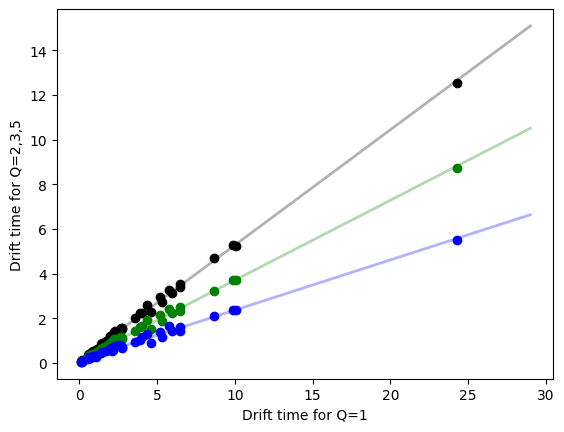

In [6]:
x = df_merge['t_drift_max1']
y2 = df_merge['t_drift_max2']
y3 = df_merge['t_drift_max3']
y5 = df_merge['t_drift_max5']

# y = a + bx
l2 = linregress(x, y2)
l3 = linregress(x, y3)
l5 = linregress(x, y5)
xline = np.arange(0,30)

plt.plot(x, y2, 'ko')
plt.plot(xline, l2.intercept + l2.slope * xline, 'k', alpha=0.3, lw=2)
plt.plot(x, y3, 'go')
plt.plot(xline, l3.intercept + l3.slope * xline, 'g', alpha=0.3, lw=2)
plt.plot(x, y5, 'bo')
plt.plot(xline, l5.intercept + l5.slope * xline, 'b', alpha=0.3, lw=2)

plt.xlabel('Drift time for Q=1')
plt.ylabel('Drift time for Q=2,3,5')
print(l2)
print(l3)
print(l5)

LinregressResult(slope=0.4964016086618745, intercept=0.0034105015962468677, rvalue=0.9977596595579284, pvalue=1.9781859078362037e-47, stderr=0.00532970982638969, intercept_stderr=0.001393104783801377)
LinregressResult(slope=0.32906560204073926, intercept=0.005713484959201251, rvalue=0.9973485507883149, pvalue=5.266179135654635e-46, stderr=0.003844782778368624, intercept_stderr=0.001004967522753621)
LinregressResult(slope=0.20431660416004901, intercept=0.004467244329760527, rvalue=0.9933035462034511, pvalue=3.5649718919190664e-38, stderr=0.003805384372775103, intercept_stderr=0.0009946693809983764)


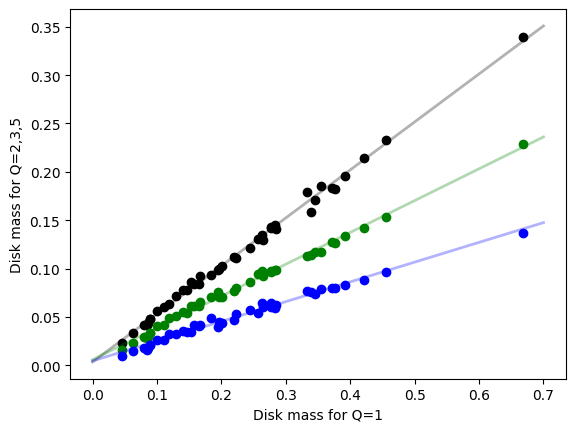

In [7]:
x = df_merge['M_max1']
y2 = df_merge['M_max2']
y3 = df_merge['M_max3']
y5 = df_merge['M_max5']

# y = a + bx
l2 = linregress(x, y2)
l3 = linregress(x, y3)
l5 = linregress(x, y5)
xline = np.arange(0,0.71,0.1)

plt.plot(x, y2, 'ko')
plt.plot(xline, l2.intercept + l2.slope * xline, 'k', alpha=0.3, lw=2)
plt.plot(x, y3, 'go')
plt.plot(xline, l3.intercept + l3.slope * xline, 'g', alpha=0.3, lw=2)
plt.plot(x, y5, 'bo')
plt.plot(xline, l5.intercept + l5.slope * xline, 'b', alpha=0.3, lw=2)

plt.xlabel('Disk mass for Q=1')
plt.ylabel('Disk mass for Q=2,3,5')
print(l2)
print(l3)
print(l5)

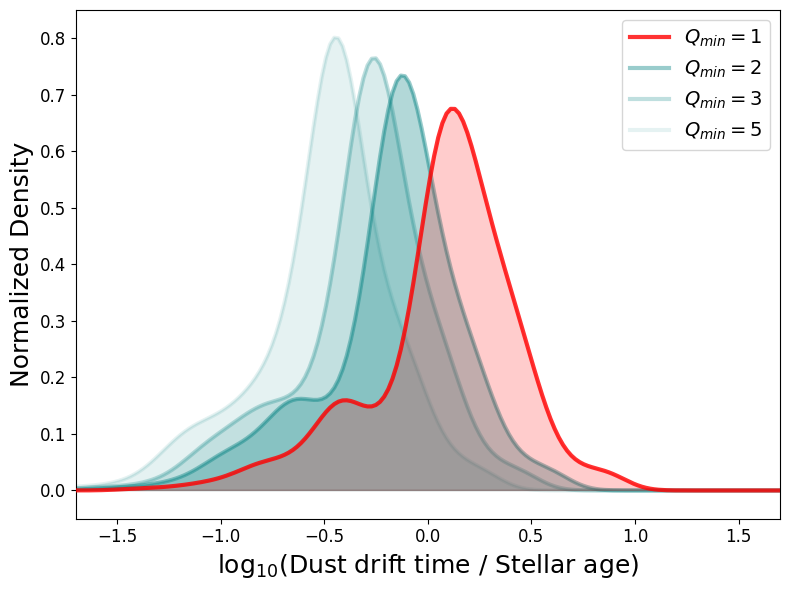

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

df1 = pd.read_csv('kernel.csv', skipinitialspace=True)
df2 = pd.read_csv('Q2/kernel.csv', skipinitialspace=True)
df3 = pd.read_csv('Q3/kernel.csv', skipinitialspace=True)
df5 = pd.read_csv('Q5/kernel.csv', skipinitialspace=True)

Qcol = 'teal'
ax.plot(df1['tratio'], 10**df1['logdens'], color='red', lw=3, alpha=0.8, label=r'$Q_{min}=1$', zorder=99)
ax.fill(df1['tratio'], 10**df1['logdens'], color='red', alpha=0.2, zorder=99)
ax.plot(df2['tratio'], 10**df2['logdens'], color=Qcol, lw=3, alpha=0.4, label=r'$Q_{min}=2$')
ax.fill(df2['tratio'], 10**df2['logdens'], color=Qcol, alpha=0.3)
ax.plot(df3['tratio'], 10**df3['logdens'], color=Qcol, lw=3, alpha=0.25, label=r'$Q_{min}=3$')
ax.fill(df3['tratio'], 10**df3['logdens'], color=Qcol, alpha=0.15)
ax.plot(df5['tratio'], 10**df5['logdens'], color=Qcol, lw=3, alpha=0.1, label=r'$Q_{min}=5$')
ax.fill(df5['tratio'], 10**df5['logdens'], color=Qcol, alpha=0.1)

ax.set_xlim(-1.7, 1.7)
ax.set_ylim(-0.05, 0.85)
ax.set_xlabel(r'log$_{10}$(Dust drift time / Stellar age)', fontsize=18)
ax.set_ylabel('Normalized Density', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.legend(fontsize=14)
fig.tight_layout()
plt.savefig('Q.pdf', dpi=150)

In [9]:
def get_logstats(type):
    x = np.log10(df_merge[type]/df_merge['t_star'])
    print(f'log10 {type} median/mean/std = {np.median(x):4.2f} {np.mean(x):4.2f} {np.std(x):4.2f}')

In [10]:
types = ['t_drift_max1', 't_drift_max2', 't_drift_max3', 't_drift_max5']
for t in types:
    get_logstats(t)

log10 t_drift_max1 median/mean/std = 0.05 -0.04 0.55
log10 t_drift_max2 median/mean/std = -0.17 -0.28 0.53
log10 t_drift_max3 median/mean/std = -0.32 -0.41 0.52
log10 t_drift_max5 median/mean/std = -0.51 -0.58 0.50
